In [1]:
from sklearn.metrics import matthews_corrcoef
import numpy as np

In [1]:
def mcc(x, y):
    FN = np.count_nonzero((x != y) & (y == 0))
    FP = np.count_nonzero((x != y) & (y == 1))
    TN = np.count_nonzero((x == y) & (y == 0))
    TP = np.count_nonzero((x == y) & (y == 1))
    # can leads to type overflow:
    return (TP * TN - FP * FN) / np.sqrt((TP + FP) * (FN + TN) * (FP + TN) * (TP + FN))
    # if so, use following:
    #  return (TP * TN - FP * FN) / (np.sqrt(TP + FP) * np.sqrt(FN + TN) * np.sqrt(FP + TN) * np.sqrt(TP + FN))

In [5]:
from time import time
import matplotlib.pyplot as plt

t_skl = []
t_mcc = []

RN = np.geomspace(100, 130000, 100, dtype=int)
for rows_n in RN:
    x = np.random.randint(0, 2, rows_n)


    y = np.random.randint(0, 2, rows_n)

    t0 = time()
    sk = matthews_corrcoef(x, y)
    t_skl.append(time() - t0)
    
    t0 = time()
    mc = mcc(x, y)
    t_mcc.append(time() - t0)
    
    assert sk == mc

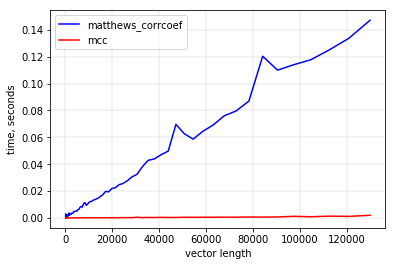

In [8]:
plt.plot(RN, t_skl, 'b', label='matthews_corrcoef')
plt.plot(RN, t_mcc, 'r', label='mcc')
plt.grid(lw=0.3)
plt.legend()
plt.xlabel('vector length')
plt.ylabel('time, seconds')
plt.show()